<a href="https://colab.research.google.com/github/bobbyknit007/ML/blob/main/Classifier/KNN_Classifier_IrisDataSet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from warnings import filterwarnings
filterwarnings('ignore')

In [26]:
df = pd.read_csv("/content/Iris.csv")

In [27]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [28]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [29]:
df['Species_encoded'] = le.fit_transform(df['Species'])

In [30]:
df.head(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Species_encoded
0,1,5.1,3.5,1.4,0.2,Iris-setosa,0
1,2,4.9,3.0,1.4,0.2,Iris-setosa,0
2,3,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5,5.0,3.6,1.4,0.2,Iris-setosa,0


In [31]:
df.drop_duplicates(inplace=True)

In [32]:
df1 = df.drop('Id',axis=1)

In [33]:
df1.head(5)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Species_encoded
0,5.1,3.5,1.4,0.2,Iris-setosa,0
1,4.9,3.0,1.4,0.2,Iris-setosa,0
2,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5.0,3.6,1.4,0.2,Iris-setosa,0


In [34]:
df1.drop_duplicates(inplace=True)

In [35]:
df1.head(5)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Species_encoded
0,5.1,3.5,1.4,0.2,Iris-setosa,0
1,4.9,3.0,1.4,0.2,Iris-setosa,0
2,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5.0,3.6,1.4,0.2,Iris-setosa,0


In [36]:
X = df1[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']]

In [37]:
Y = np.array(df1['Species_encoded']).reshape(-1,1)

In [38]:
from sklearn.model_selection import train_test_split

In [39]:
#X = df1.drop(['Species_encoded','Species'],axis='columns')
#Y = df1.Species_encoded

In [40]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=1)

In [41]:
len(X_train)

117

In [42]:
len(X_test)

30

In [43]:
from sklearn.neighbors import KNeighborsClassifier
knn  = KNeighborsClassifier(n_neighbors=10)

In [44]:
knn.fit(X_train,Y_train)

KNeighborsClassifier(n_neighbors=10)

In [45]:
knn.score(X_test,Y_test)

0.9666666666666667

In [46]:
knn.predict([[6.3,2.5,5.0,1.9]])

array([2])

In [47]:
from sklearn.metrics import confusion_matrix
Y_pred = knn.predict(X_test)
cm = confusion_matrix(Y_test,Y_pred)


Text(58.222222222222214, 0.5, 'Truth')

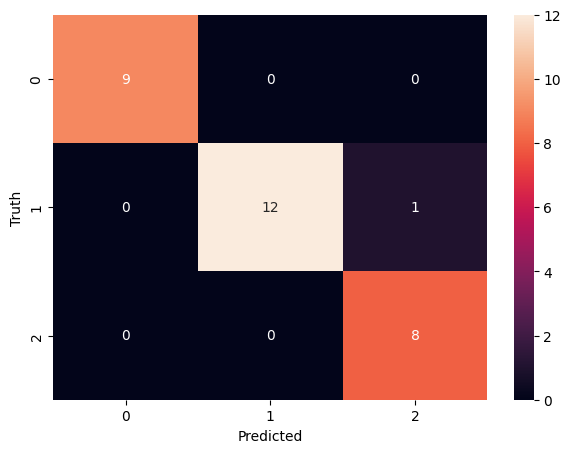

In [48]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(7,5))
sns.heatmap(cm,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')